In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tensorflow as tf
from tensorflow import keras
tf.__version__

'1.15.0'

In [4]:
import twoModelAnalysis as TWA

In [5]:
# this is the setting for plots for research paper and articles.
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
plt.rc('mathtext',**{'default':'regular'})

# Set the style for seaborn 
plt.style.use(['seaborn-white', 'seaborn-paper'])

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'small',
         'axes.labelsize': 'medium',
         'axes.titlesize': 'medium',
         'xtick.labelsize': 'small',
         'ytick.labelsize': 'small'
         }

pylab.rcParams.update(**params)

import seaborn as sns
sns.set_context(rc=params)

def stylize_axes(ax, title):
    # removes the top and right lines from the plot rectangle
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.xaxis.set_tick_params(top=False, direction='out', width=1)
    ax.yaxis.set_tick_params(right=False, direction='out', width=1)
    
    # Enforce the size of the title, label and tick labels
    #ax.set_xlabel(ax.get_xlabel(), fontsize='medium')
    #ax.set_ylabel(ax.get_ylabel(), fontsize='medium')
    
    #ax.set_yticklabels(ax.get_yticklabels(), fontsize='medium')
    #ax.set_xticklabels(fontsize='medium')
   
    ax.set_title(title)
    
def save_image(fig, title):
    if title is not None:
        fig.savefig('../Results/images/'+title+".png", dpi=300, bbox_inches='tight', transparent=True)
        fig.savefig('../Results/images/'+title+".pdf", bbox_inches='tight')

def figure_size(fig, size):
    fig.set_size_inches(size)
    fig.tight_layout()

In [6]:
sns.set(font_scale=1.3, style="whitegrid")

In [25]:
def plot_untargeted_targeted_success_score(source_untar_results, source_tar_results, target_untar_results, 
                                           target_tar_results, fig_name):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12, 3.5))

    for attack_type in np.unique(source_untar_results['Attack Method'].values):
        # plot the source model values
        y = source_untar_results[source_untar_results['Attack Method'] == attack_type]['Modified Success Score'].values
        p = ax[0].plot(epsilon, y, label = attack_type)
        ax[0].scatter(epsilon, y, c = p[0].get_color())
        
        # Plot the target model values
        y = target_untar_results[target_untar_results['Attack Method'] == attack_type]['Modified Success Score'].values
        p1 = ax[0].plot(epsilon, y, linestyle='--', c = p[0].get_color())
        ax[0].scatter(epsilon, y, marker='*', c = p[0].get_color())


    # put the xticks to the values of epsilon
    ax[0].set_xticks([0.1, 0.25, 0.5, 0.9])

    # put the xlabel and ylabel
    ax[0].set_xlabel("Perturbation Budget ($\epsilon$)")
    ax[0].set_ylabel("Success Score (%)")
    stylize_axes(ax[0], "Untargeted adversarial examples")


    for attack_type in np.unique(source_tar_results['Attack Method'].values):
        # plot the source model values
        y = source_tar_results[source_tar_results['Attack Method'] == attack_type]['Success Score'].values
        p = ax[1].plot(epsilon, y, label = attack_type)
        ax[1].scatter(epsilon, y, c = p[0].get_color())

        # plot the target model values
        y = target_tar_results[target_tar_results['Attack Method'] == attack_type]['Success Score'].values
        p1 = ax[1].plot(epsilon, y, linestyle='--', c = p[0].get_color())
        ax[1].scatter(epsilon, y, marker='*', c = p[0].get_color())


    # put the xticks to the values of epsilon
    ax[1].set_xticks([0.1, 0.25, 0.5, 0.9])

    # put the xlabel and ylabel
    ax[1].set_xlabel("Perturbation Budget ($\epsilon$)")
    # ax[1].set_ylabel("Success Score (%)")
    stylize_axes(ax[1], "Targeted adversarial examples")

    # put the model legend in the top left corner
    legend1 = ax[1].legend([p[0], p1[0]], [source_name, target_name], loc='upper right', 
                           bbox_to_anchor=(1.0, 0.85), 
                         fontsize='medium')
    # ax[0].get_gca().add_artist(legend1)

    # Shrink current axis by 40%
    box = ax[0].get_position()
    ax[0].set_position([box.x0, box.y0, box.width * 0.99, box.height])

    # Put the attack method legend to the right of the current axis
    ax[0].legend(loc='center left', bbox_to_anchor=(2.2, 0.5), fontsize='medium')

    save_image(fig, fig_name)

In [8]:
images_result_path = "../Results/images/"
data_result_path = "../Results/texts/"

In [9]:
epsilon = [0.1, 0.25, 0.5, 0.9]
min_value = -1.0
max_value = 1.0
n_iterations = 50
target_class = 3

In [10]:
BATCH_SIZE = 32
LEARNING_RATE = 0.001
N_EPOCHS = 100

In [11]:
os.listdir("../Processed data/")

['adl_activity_dataset_small.pickle',
 'adl_activity_dataset_small_minmax_scaled.pickle',
 'adl_activity_data_complete.pickle',
 'adl_activity_feature_dataset_small.pickle',
 'adl_dataset_small_minmax_scaled_feature.pickle',
 'adl_posture_dataset.pickle',
 'adl_posture_dataset_small.pickle',
 'adl_posture_data_complete.pickle',
 'adl_posture_feature_dataset.pickle',
 'adl_posture_feature_dataset_1.pickle',
 'DL_source_dataset.pickle',
 'DL_target_dataset.pickle',
 'mHealth_ankle_dataset.pickle',
 'mHealth_ankle_feature_dataset.pickle',
 'mHealth_chest_dataset.pickle',
 'mHealth_chest_feature_dataset.pickle',
 'mHealth_wrist_dataset.pickle',
 'mHealth_wrist_feature_dataset.pickle',
 'mHealth_wrist_feature_dataset_1.pickle',
 'mHealth_wrist_source_dataset.pickle',
 'mHealth_wrist_target_dataset.pickle',
 'uci_body_acc_dataset.pickle',
 'uci_feature_dataset.pickle',
 'uci_feature_dataset_1.pickle',
 'uci_source_dataset.pickle',
 'uci_target_dataset.pickle']

In [19]:
f = open("../Processed data/mHealth_ankle_dataset.pickle", "rb")
x, y = pickle.load(f)
f.close()

In [20]:
np.unique(y, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([460, 460, 460, 460, 460, 426, 444, 441, 460, 460, 460], dtype=int64))

# Chest vs Ankle

In [21]:
my_two_model = TWA.TwoModel("../Processed data/mHealth_chest_dataset.pickle", 
                       "../Processed data/mHealth_ankle_dataset.pickle", [], save_results=True)

Loading Source Dataset
X: (4991, 128, 3)
Y: (4991,)
Loading Target Dataset
X: (4991, 128, 3)
Y: (4991,)


In [22]:
my_two_model.prepare_for_training(batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE, 
                                   n_epochs=N_EPOCHS)

Source
Training set (3368, 128, 3) 
Test set (1248, 128, 3)
Validation set (375, 128, 3)
Target
Training set (3368, 128, 3) 
Test set (1248, 128, 3)
Validation set (375, 128, 3)
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


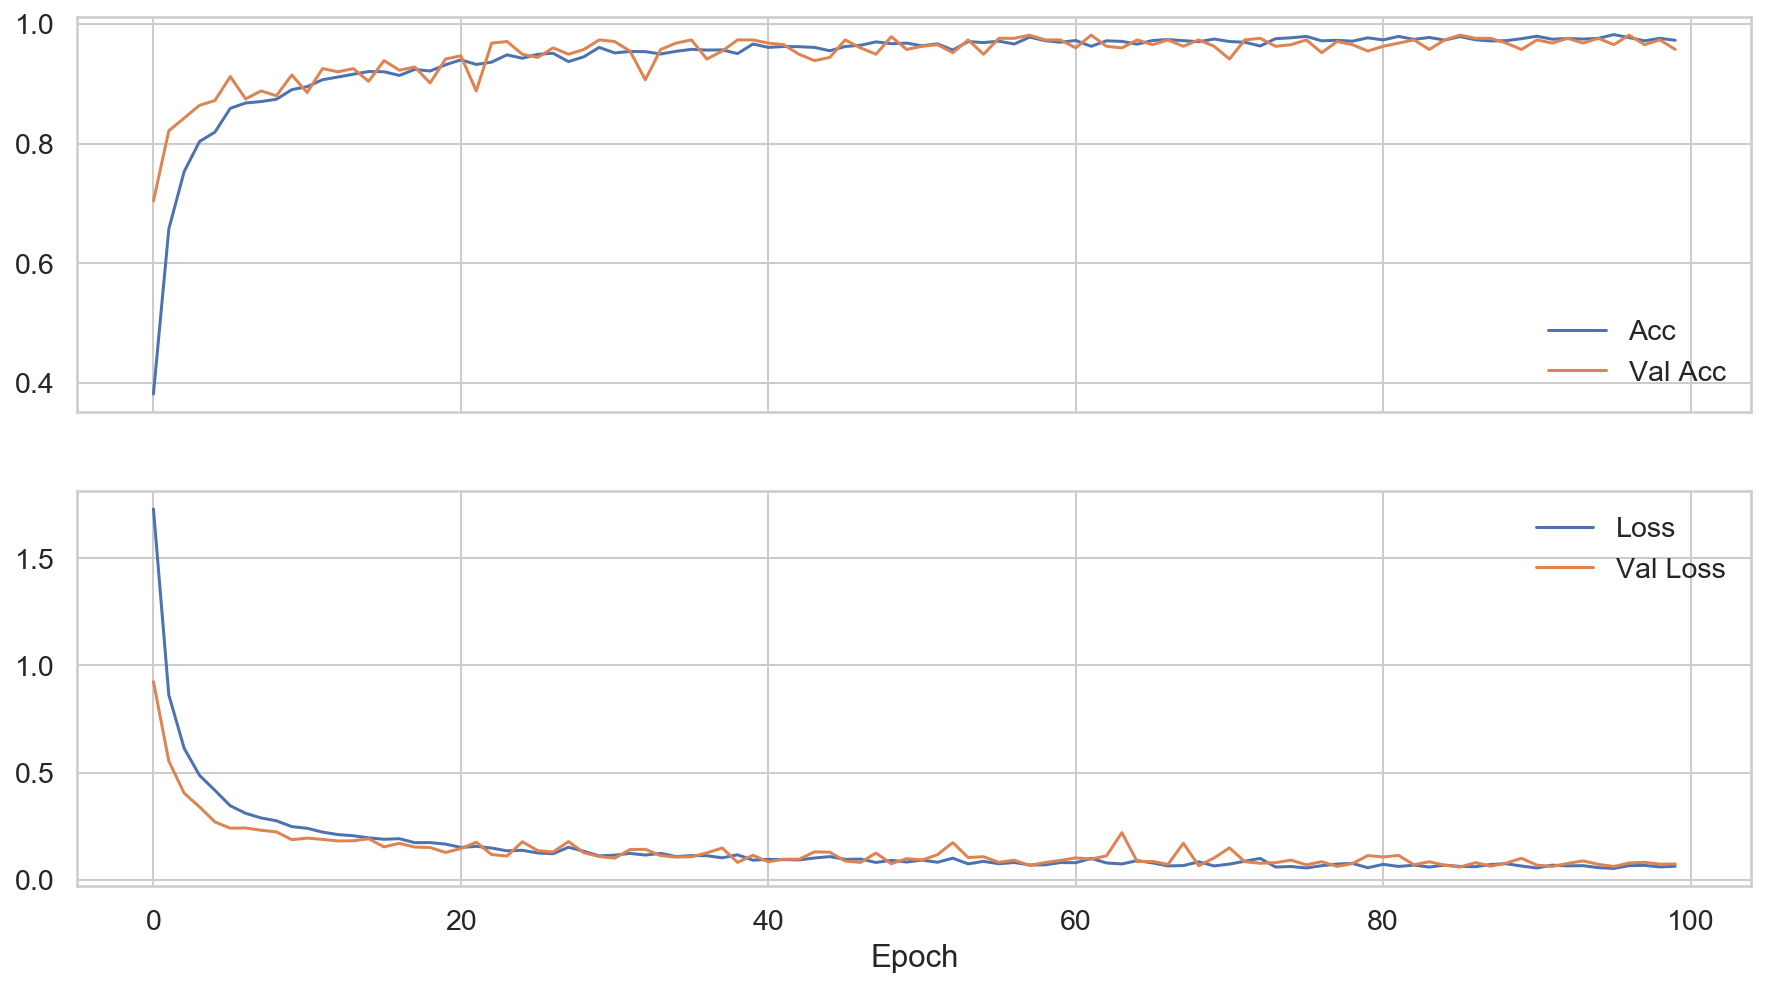

Saving trained source and target models
Source model path: ../Saved Model/mh_chest_source_model
Target model path: ../Saved Model/mh_ankle_target_model
Performance of the source model mh_chest_source_model
4991/4991 [==============================] - 0s 67us/sample - loss: 0.0344 - acc: 0.98820s - loss: 0.0349 - acc: 0.9
On Source Dataset Loss: 0.034, Accuracy 98.818
4991/4991 [==============================] - 0s 65us/sample - loss: 25.8254 - acc: 0.1220s - loss: 26.4299 - a
On Target Dataset Loss: 25.825, Accuracy 12.202
Performance of the target model mh_ankle_target_model
4991/4991 [==============================] - 0s 65us/sample - loss: 95.5236 - acc: 0.1875
On Source Dataset Loss: 95.524, Accuracy 18.754
4991/4991 [==============================] - 0s 60us/sample - loss: 0.0605 - acc: 0.9675
On Target Dataset Loss: 0.061, Accuracy 96.754


In [23]:
my_two_model.train_models("mh_chest_source_model", "mh_ankle_target_model")

In [24]:
my_two_model.adversarial_init(epsilon, min_value, max_value, n_iterations, target_class)

In [25]:
my_two_model.adversarial_untargeted_attacks("mh_chest_source_untar_results", "mh_ankle_target_untar_results")

C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\attacks_tf.py:27: UserWarning: attacks_tf is deprecated and will be removed on 2019-07-18 or after. Code should import functions from their new locations directly.
  warnings.warn("attacks_tf is deprecated and will be removed on 2019-07-18"
[INFO 2020-11-09 14:28:40,459 cleverhans] Constructing new graph for attack FastGradientMethod



Instructions for updating:
Use `tf.cast` instead.


Instructions for updating:
dim is deprecated, use axis instead


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-09 14:28:40,752 cleverhans] Constructing new graph for a

Instructions for updating:
tf.py_func is deprecated in TF V2. Instead, there are two
    options available in V2.
    - tf.py_function takes a python function which manipulates tf eager
    tensors instead of numpy arrays. It's easy to convert a tf eager tensor to
    an ndarray (just call tensor.numpy()) but having access to eager tensors
    means `tf.py_function`s can use accelerators such as GPUs as well as
    being differentiable using a gradient tape.
    - tf.numpy_function maintains the semantics of the deprecated tf.py_func
    (it is not differentiable, and manipulates numpy arrays). It drops the
    stateful argument making all functions stateful.
    


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "


C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


1248/1248 [==============================] - 0s 64us/sample - loss: 94.5533 - acc: 0.1859


[INFO 2020-11-09 14:44:52,307 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1248/1248 [==============================] - 0s 66us/sample - loss: 94.5325 - acc: 0.1859


[INFO 2020-11-09 14:59:12,916 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1248/1248 [==============================] - 0s 70us/sample - loss: 94.5332 - acc: 0.1859


[INFO 2020-11-09 15:13:41,596 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1248/1248 [==============================] - 0s 64us/sample - loss: 94.5749 - acc: 0.1859
Saving the results of untargeted attacks.
Source model results at ../Results/texts/mh_chest_source_untar_results.csv
Source model results at ../Results/texts/mh_ankle_target_untar_results.csv


In [26]:
my_two_model.adversarial_targeted_attacks("mh_chest_source_tar_results", "mh_ankle_target_tar_results")

[INFO 2020-11-09 15:28:18,481 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-09 15:28:18,953 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 69us/sample - loss: 167.6660 - acc: 0.0000e+00


[INFO 2020-11-09 15:46:44,011 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-09 15:46:44,541 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 72us/sample - loss: 167.7283 - acc: 0.0000e+00


[INFO 2020-11-09 16:05:02,436 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-09 16:05:03,036 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 133us/sample - loss: 167.8303 - acc: 0.0000e+00


[INFO 2020-11-09 16:26:08,062 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-09 16:26:08,885 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 141us/sample - loss: 167.9330 - acc: 0.0000e+00
Saving the results of targeted attacks.
Source model results at ../Results/texts/mh_chest_source_tar_results.csv
Source model results at ../Results/texts/mh_ankle_target_tar_results.csv


In [12]:
source_untar_results = pd.read_csv(data_result_path+"mh_chest_source_untar_results.csv")
source_tar_results = pd.read_csv(data_result_path+"mh_chest_source_tar_results.csv")

In [13]:
target_untar_results = pd.read_csv(data_result_path+"mh_ankle_target_untar_results.csv")
target_tar_results = pd.read_csv(data_result_path+"mh_ankle_target_tar_results.csv")

In [14]:
source_name = "Chest"
target_name = "Left-Ankle"

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

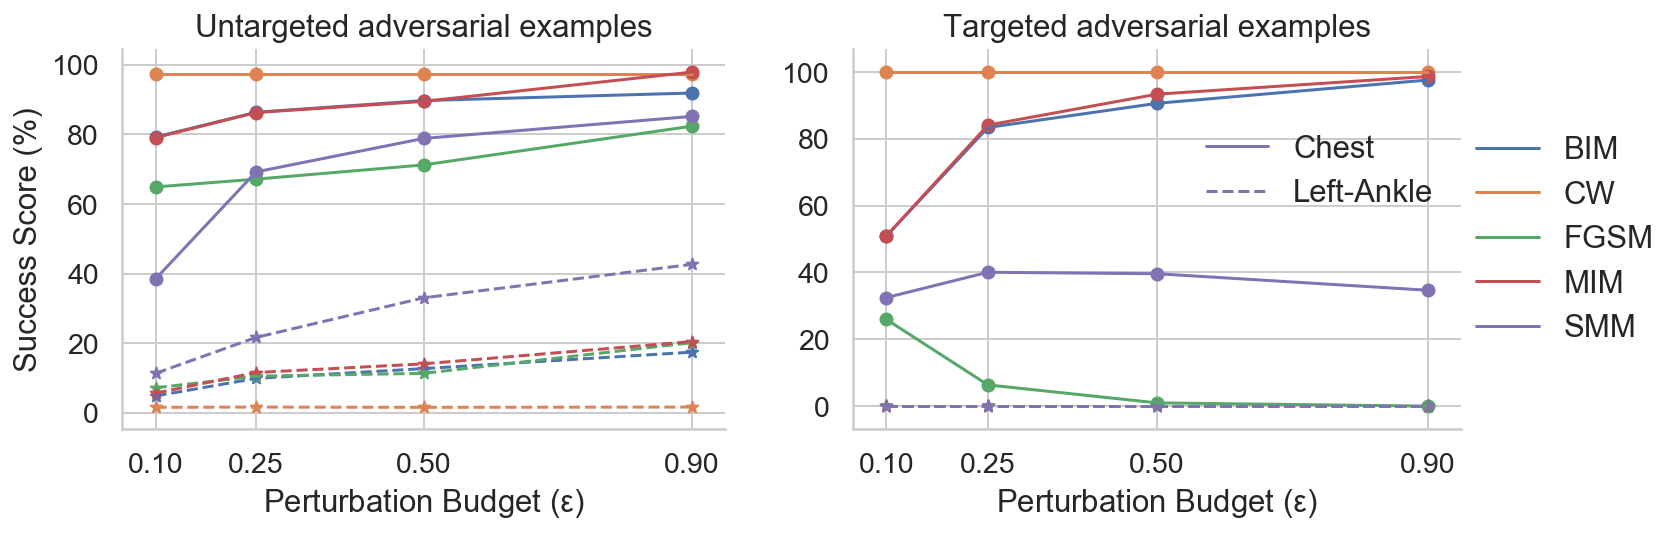

In [15]:
plot_untargeted_targeted_success_score(source_untar_results, source_tar_results, target_untar_results,
                                      target_tar_results, "mh_chest_source_ankle_target_cross_loc")

# Wrist Vs. Chest

In [42]:
my_two_model = TWA.TwoModel("../Processed data/mHealth_wrist_dataset.pickle", 
                       "../Processed data/mHealth_chest_dataset.pickle", [], save_results=True)

Loading Source Dataset
X: (4991, 128, 3)
Y: (4991,)
Loading Target Dataset
X: (4991, 128, 3)
Y: (4991,)


In [43]:
my_two_model.prepare_for_training(batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE, 
                                   n_epochs=N_EPOCHS)

Source
Training set (3368, 128, 3) 
Test set (1248, 128, 3)
Validation set (375, 128, 3)
Target
Training set (3368, 128, 3) 
Test set (1248, 128, 3)
Validation set (375, 128, 3)


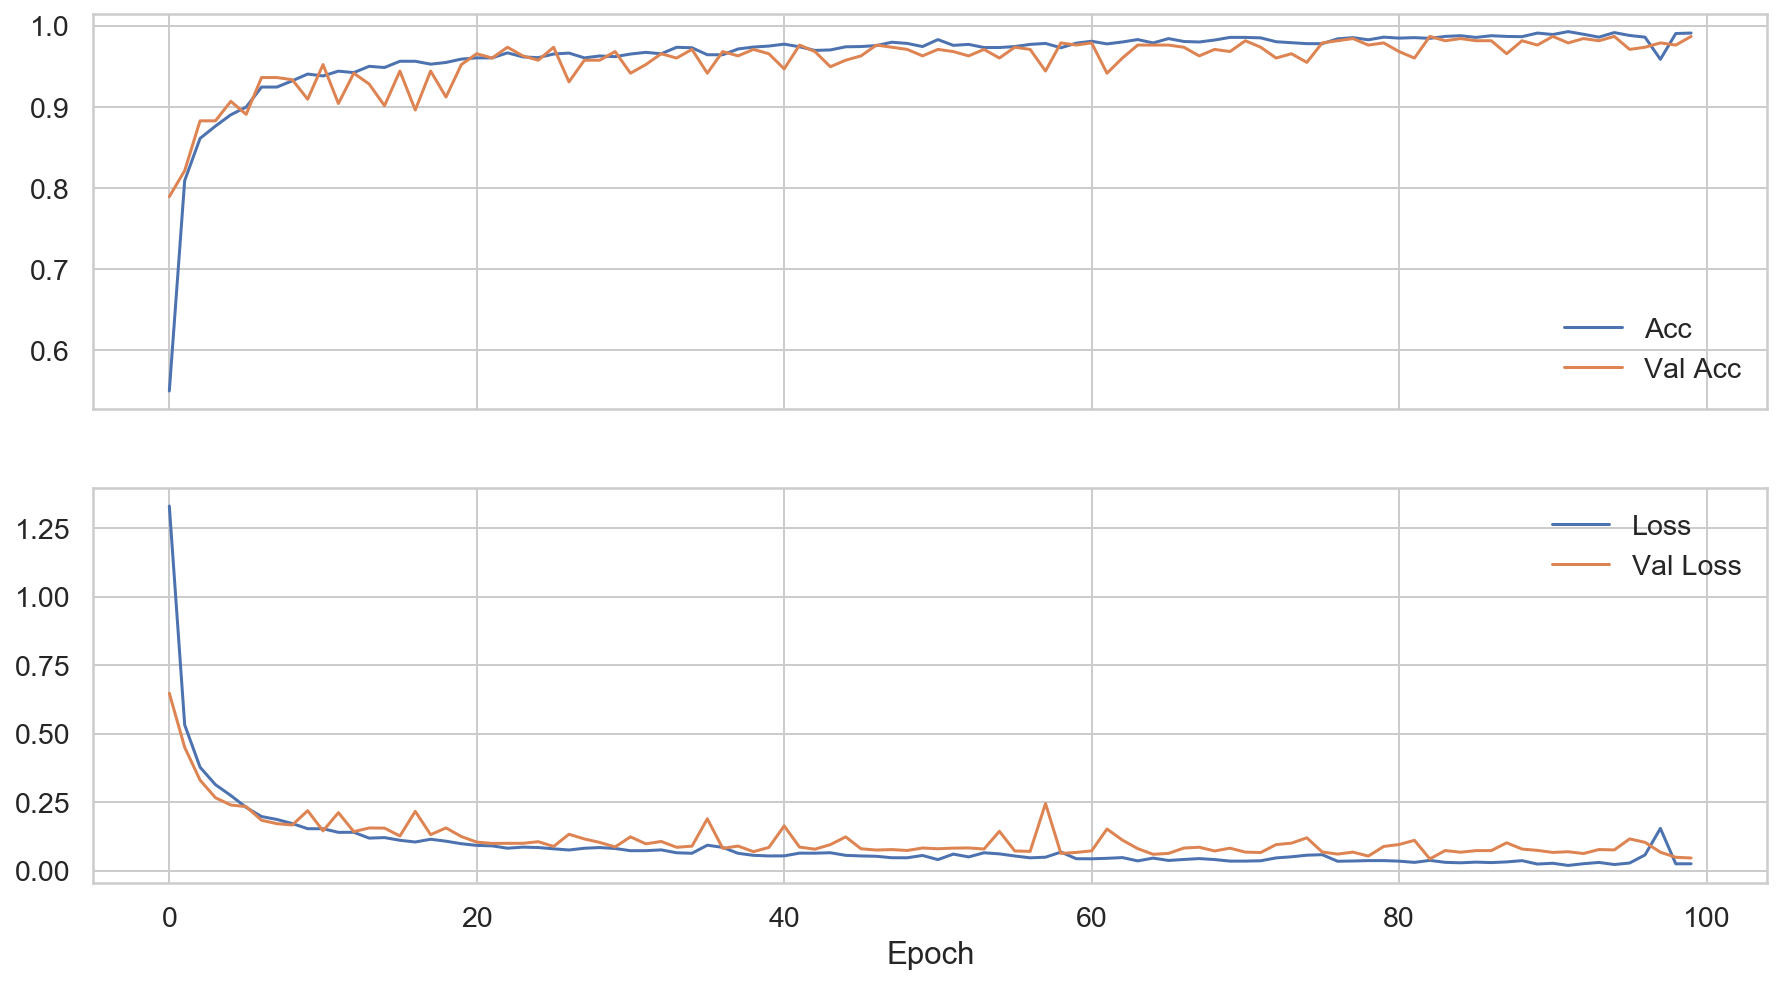

Saving trained source and target models
Source model path: ../Saved Model/mh_wrist_source_model
Target model path: ../Saved Model/mh_chest_target_model
Performance of the source model mh_wrist_source_model
4991/4991 [==============================] - 1s 166us/sample - loss: 0.0170 - acc: 0.9968
On Source Dataset Loss: 0.017, Accuracy 99.679
4991/4991 [==============================] - 1s 158us/sample - loss: 25.1777 - acc: 0.1869
On Target Dataset Loss: 25.178, Accuracy 18.694
Performance of the target model mh_chest_target_model
4991/4991 [==============================] - 1s 150us/sample - loss: 34.8264 - acc: 0.2358
On Source Dataset Loss: 34.826, Accuracy 23.582
4991/4991 [==============================] - 1s 145us/sample - loss: 0.0224 - acc: 0.9918
On Target Dataset Loss: 0.022, Accuracy 99.179


In [44]:
my_two_model.train_models("mh_wrist_source_model", "mh_chest_target_model")

In [45]:
my_two_model.adversarial_init(epsilon, min_value, max_value, n_iterations, target_class)

In [46]:
my_two_model.adversarial_untargeted_attacks("mh_wrist_source_untar_results", "mh_chest_target_untar_results")

[INFO 2020-11-09 22:42:16,815 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1248/1248 [==============================] - 0s 147us/sample - loss: 35.9418 - acc: 0.2035


[INFO 2020-11-09 23:01:20,241 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1248/1248 [==============================] - 0s 171us/sample - loss: 35.9545 - acc: 0.2019


[INFO 2020-11-09 23:20:54,685 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1248/1248 [==============================] - 0s 170us/sample - loss: 35.9949 - acc: 0.2003


[INFO 2020-11-09 23:39:20,651 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1248/1248 [==============================] - 0s 164us/sample - loss: 36.0355 - acc: 0.2003
Saving the results of untargeted attacks.
Source model results at ../Results/texts/mh_wrist_source_untar_results.csv
Source model results at ../Results/texts/mh_chest_target_untar_results.csv


In [47]:
my_two_model.adversarial_targeted_attacks("mh_wrist_source_tar_results", "mh_chest_target_tar_results")

[INFO 2020-11-09 23:57:27,954 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-09 23:57:29,004 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 182us/sample - loss: 4.1948 - acc: 0.7933


[INFO 2020-11-10 00:19:42,230 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-10 00:19:43,353 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 182us/sample - loss: 4.1758 - acc: 0.7933


[INFO 2020-11-10 00:43:12,175 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-10 00:43:13,366 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 180us/sample - loss: 4.1861 - acc: 0.7917


[INFO 2020-11-10 01:07:13,604 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-10 01:07:14,870 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 191us/sample - loss: 4.1352 - acc: 0.7941
Saving the results of targeted attacks.
Source model results at ../Results/texts/mh_wrist_source_tar_results.csv
Source model results at ../Results/texts/mh_chest_target_tar_results.csv


In [16]:
source_untar_results = pd.read_csv(data_result_path+"mh_wrist_source_untar_results.csv")
source_tar_results = pd.read_csv(data_result_path+"mh_wrist_source_tar_results.csv")

target_untar_results = pd.read_csv(data_result_path+"mh_chest_target_untar_results.csv")
target_tar_results = pd.read_csv(data_result_path+"mh_chest_target_tar_results.csv")

In [17]:
source_name = 'Right-Wrist'
target_name = "Chest"

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

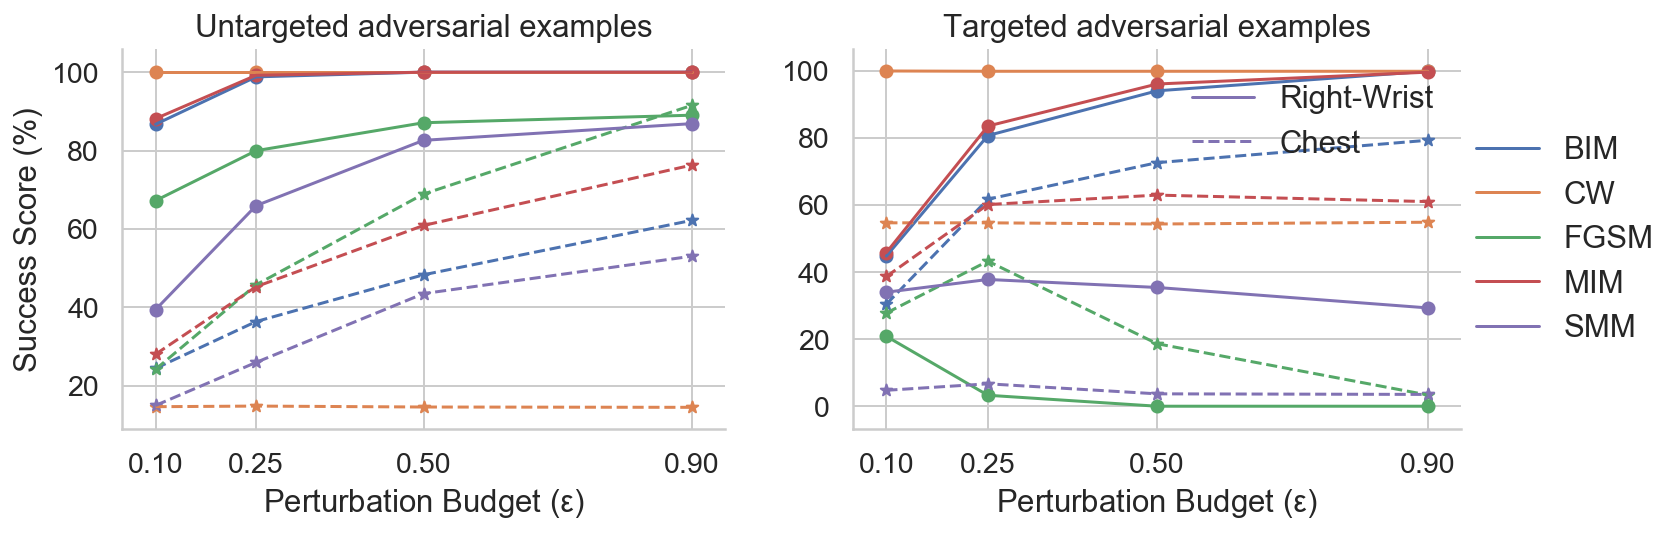

In [24]:
plot_untargeted_targeted_success_score(source_untar_results, source_tar_results, target_untar_results,
                                      target_tar_results, "mh_wrist_source_chest_target_cross_loc")

# Ankle Vs. Wrist

In [48]:
my_two_model = TWA.TwoModel("../Processed data/mHealth_ankle_dataset.pickle", 
                       "../Processed data/mHealth_wrist_dataset.pickle", [], save_results=True)

Loading Source Dataset
X: (4991, 128, 3)
Y: (4991,)
Loading Target Dataset
X: (4991, 128, 3)
Y: (4991,)


In [49]:
my_two_model.prepare_for_training(batch_size=BATCH_SIZE, learning_rate=LEARNING_RATE, 
                                   n_epochs=N_EPOCHS)

Source
Training set (3368, 128, 3) 
Test set (1248, 128, 3)
Validation set (375, 128, 3)
Target
Training set (3368, 128, 3) 
Test set (1248, 128, 3)
Validation set (375, 128, 3)


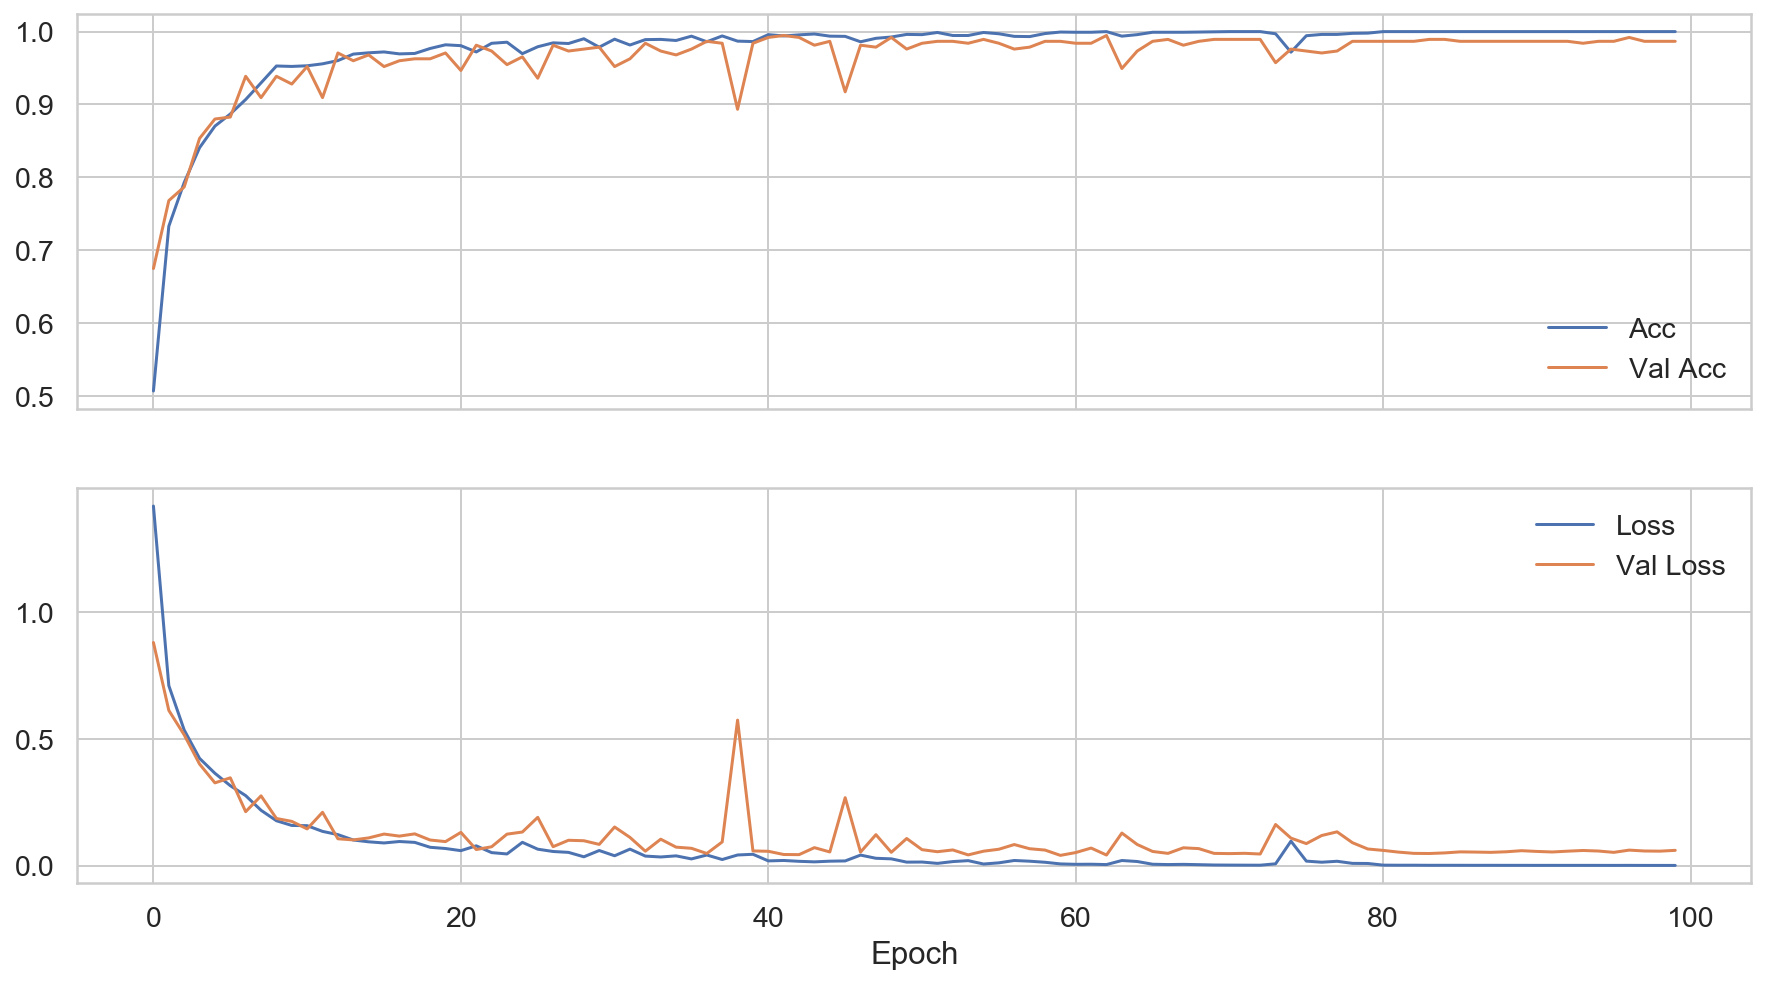

Saving trained source and target models
Source model path: ../Saved Model/mh_ankle_source_model
Target model path: ../Saved Model/mh_wrist_target_model
Performance of the source model mh_ankle_source_model
4991/4991 [==============================] - 1s 209us/sample - loss: 0.0349 - acc: 0.9856
On Source Dataset Loss: 0.035, Accuracy 98.557
4991/4991 [==============================] - 1s 200us/sample - loss: 36.2321 - acc: 0.2206
On Target Dataset Loss: 36.232, Accuracy 22.060
Performance of the target model mh_wrist_target_model
4991/4991 [==============================] - 1s 197us/sample - loss: 22.6970 - acc: 0.1990
On Source Dataset Loss: 22.697, Accuracy 19.896
4991/4991 [==============================] - 1s 199us/sample - loss: 0.0263 - acc: 0.9944
On Target Dataset Loss: 0.026, Accuracy 99.439


In [50]:
my_two_model.train_models("mh_ankle_source_model", "mh_wrist_target_model")

In [51]:
my_two_model.adversarial_init(epsilon, min_value, max_value, n_iterations, target_class)

In [52]:
my_two_model.adversarial_untargeted_attacks("mh_ankle_source_untar_results", "mh_wrist_target_untar_results")

[INFO 2020-11-10 01:41:54,232 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1248/1248 [==============================] - 0s 208us/sample - loss: 23.6062 - acc: 0.1651


[INFO 2020-11-10 02:03:21,473 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1248/1248 [==============================] - 0s 199us/sample - loss: 23.6272 - acc: 0.1619


[INFO 2020-11-10 02:25:22,500 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1248/1248 [==============================] - 0s 205us/sample - loss: 23.6372 - acc: 0.1635


[INFO 2020-11-10 02:48:04,719 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_max_v1 at 0x000001FAEF22C708> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent f

1248/1248 [==============================] - 0s 219us/sample - loss: 23.6600 - acc: 0.1635
Saving the results of untargeted attacks.
Source model results at ../Results/texts/mh_ankle_source_untar_results.csv
Source model results at ../Results/texts/mh_wrist_target_untar_results.csv


In [53]:
my_two_model.adversarial_targeted_attacks("mh_ankle_source_tar_results", "mh_wrist_target_tar_results")

[INFO 2020-11-10 03:11:57,308 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-10 03:11:59,034 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 224us/sample - loss: 39.2634 - acc: 0.0000e+00


[INFO 2020-11-10 03:41:41,896 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-10 03:41:43,670 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 223us/sample - loss: 39.2737 - acc: 0.0000e+00


[INFO 2020-11-10 04:13:14,686 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-10 04:13:16,542 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 232us/sample - loss: 39.2356 - acc: 0.0000e+00


[INFO 2020-11-10 04:45:04,262 cleverhans] Constructing new graph for attack FastGradientMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions has now been dropped.
  warnings.warn(str(f) + " is deprecated. Switch to calling the equivalent function in tensorflow. "
[INFO 2020-11-10 04:45:06,221 cleverhans] Constructing new graph for attack BasicIterativeMethod
C:\Users\rames\Anaconda3\envs\venvTF1.15\lib\site-packages\cleverhans\compat.py:22: UserWarning: <function reduce_sum_v1 at 0x000001FAEF228798> is deprecated. Switch to calling the equivalent function in tensorflow.  This function was originally needed as a compatibility layer for old versions of tensorflow,  but support for those versions h

1248/1248 [==============================] - 0s 238us/sample - loss: 39.2156 - acc: 0.0000e+00
Saving the results of targeted attacks.
Source model results at ../Results/texts/mh_ankle_source_tar_results.csv
Source model results at ../Results/texts/mh_wrist_target_tar_results.csv


In [26]:
source_untar_results = pd.read_csv(data_result_path+"mh_ankle_source_untar_results.csv")
source_tar_results = pd.read_csv(data_result_path+"mh_ankle_source_tar_results.csv")

target_untar_results = pd.read_csv(data_result_path+"mh_wrist_target_untar_results.csv")
target_tar_results = pd.read_csv(data_result_path+"mh_wrist_target_tar_results.csv")

In [27]:
source_name = "Left-Ankle"
target_name = "Right-Wrist"

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

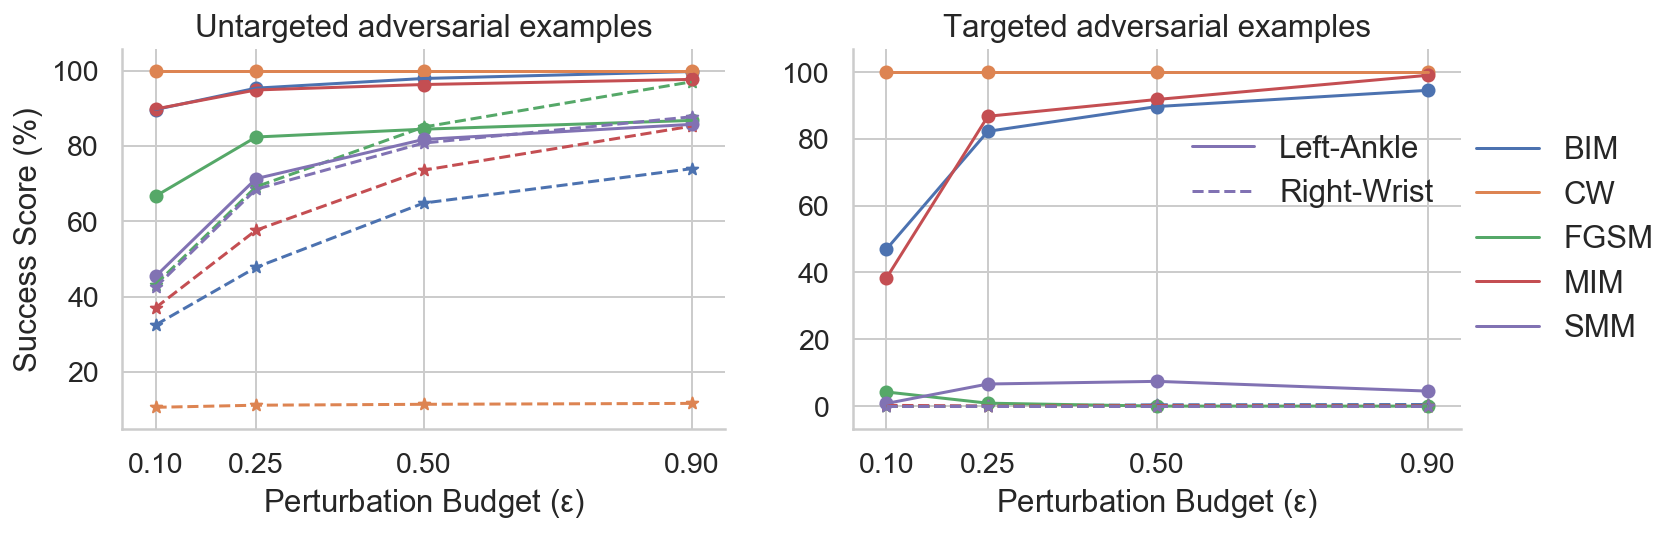

In [28]:
plot_untargeted_targeted_success_score(source_untar_results, source_tar_results, target_untar_results,
                                      target_tar_results, "mh_ankle_source_wrist_target_cross_loc")